In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv("/Users/palammysurareddy/Downloads/AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns=['Date','Number of passengers']
df.head()

,Date,Number of passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


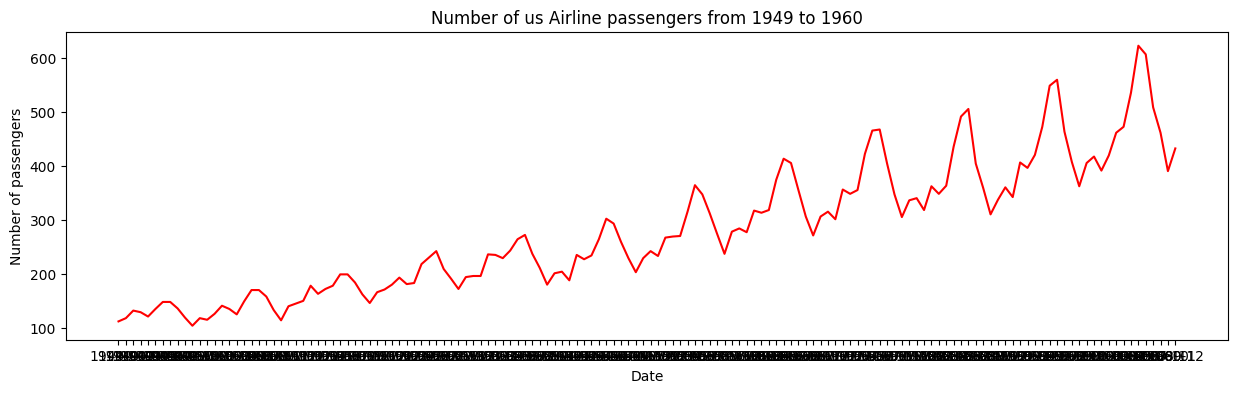

In [5]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Number of passengers',dpi=100):
    plt.figure(figsize=(15,4),dpi=100)
    plt.plot(x,y,color='red')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['Date'],y=df['Number of passengers'],title='Number of us Airline passengers from 1949 to 1960')

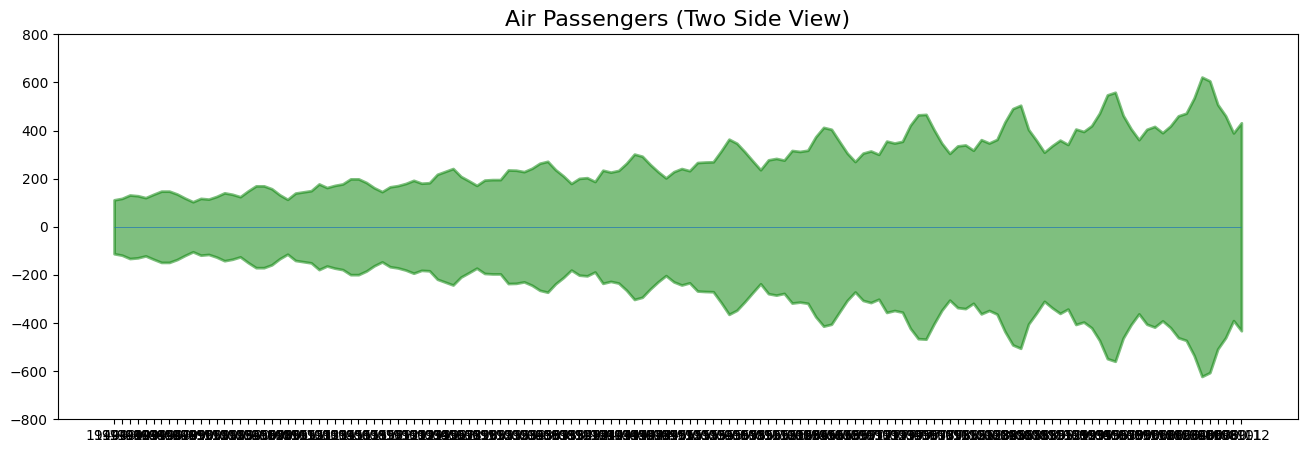

In [6]:
x=df['Date'].values
y1=df['Number of passengers'].values
fig,ax=plt.subplots(1,1,figsize=(16,5),dpi=100)
plt.fill_between(x,y1=y1,y2=-y1,alpha=0.5,linewidth=2,color='green')
plt.ylim(-800,800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

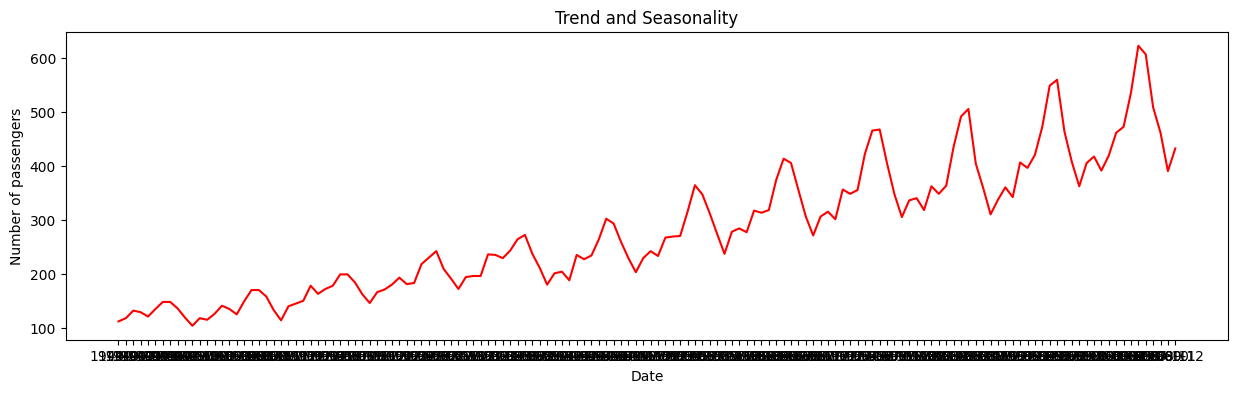

In [7]:
def polt_df(df,x,y,title="",xlabel='Date',ylabel='Number of passengers',dpi=100):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='bule')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['Date'],y=df['Number of passengers'],title='Trend and Seasonality')

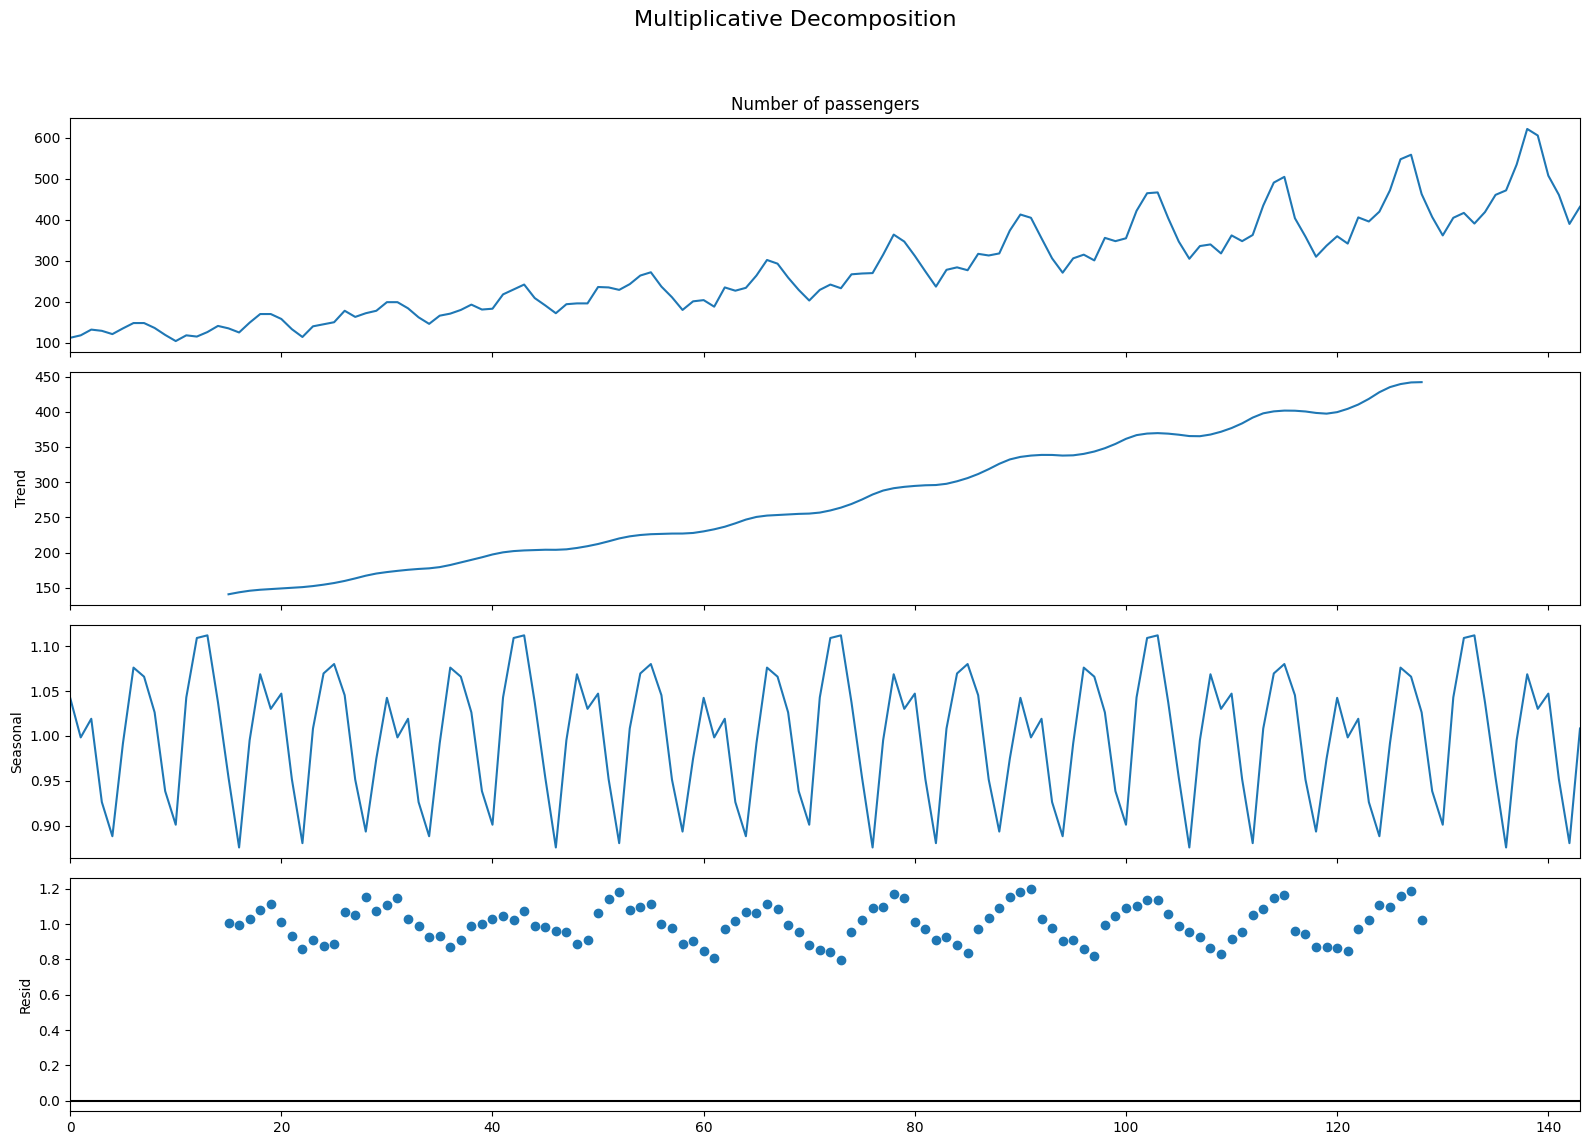

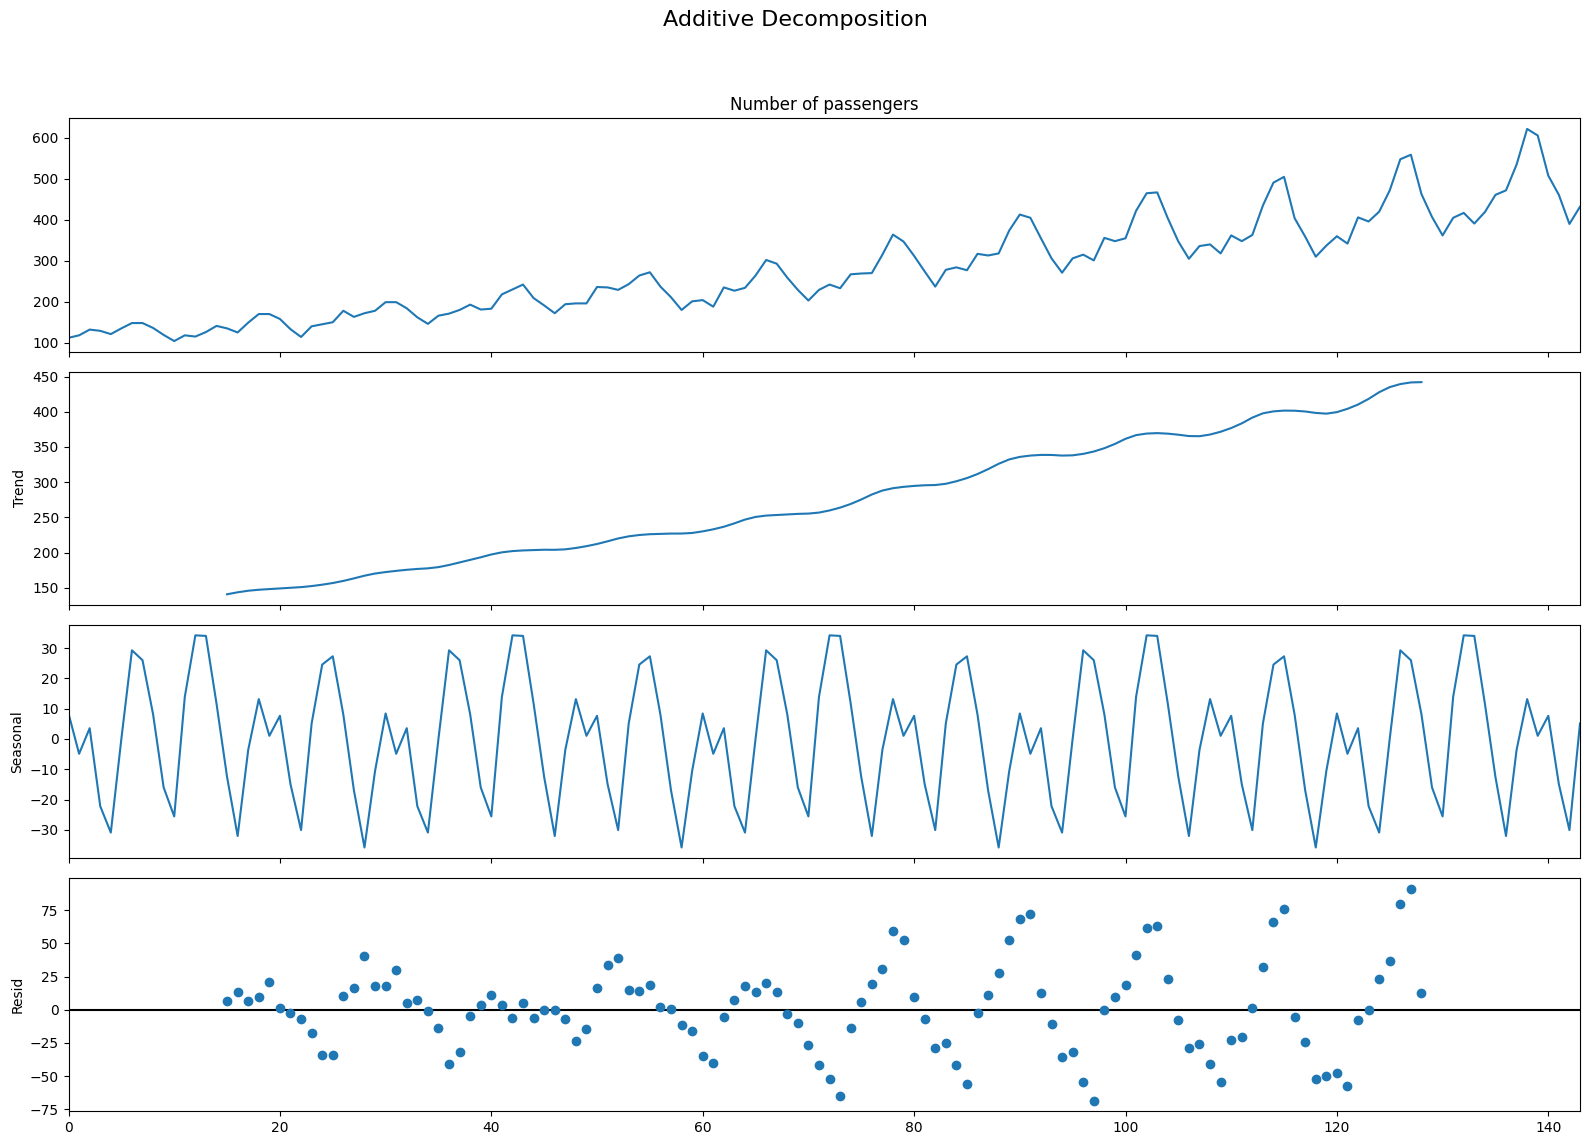

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<Axes: title={'center': 'Ramdom White Noise'}>

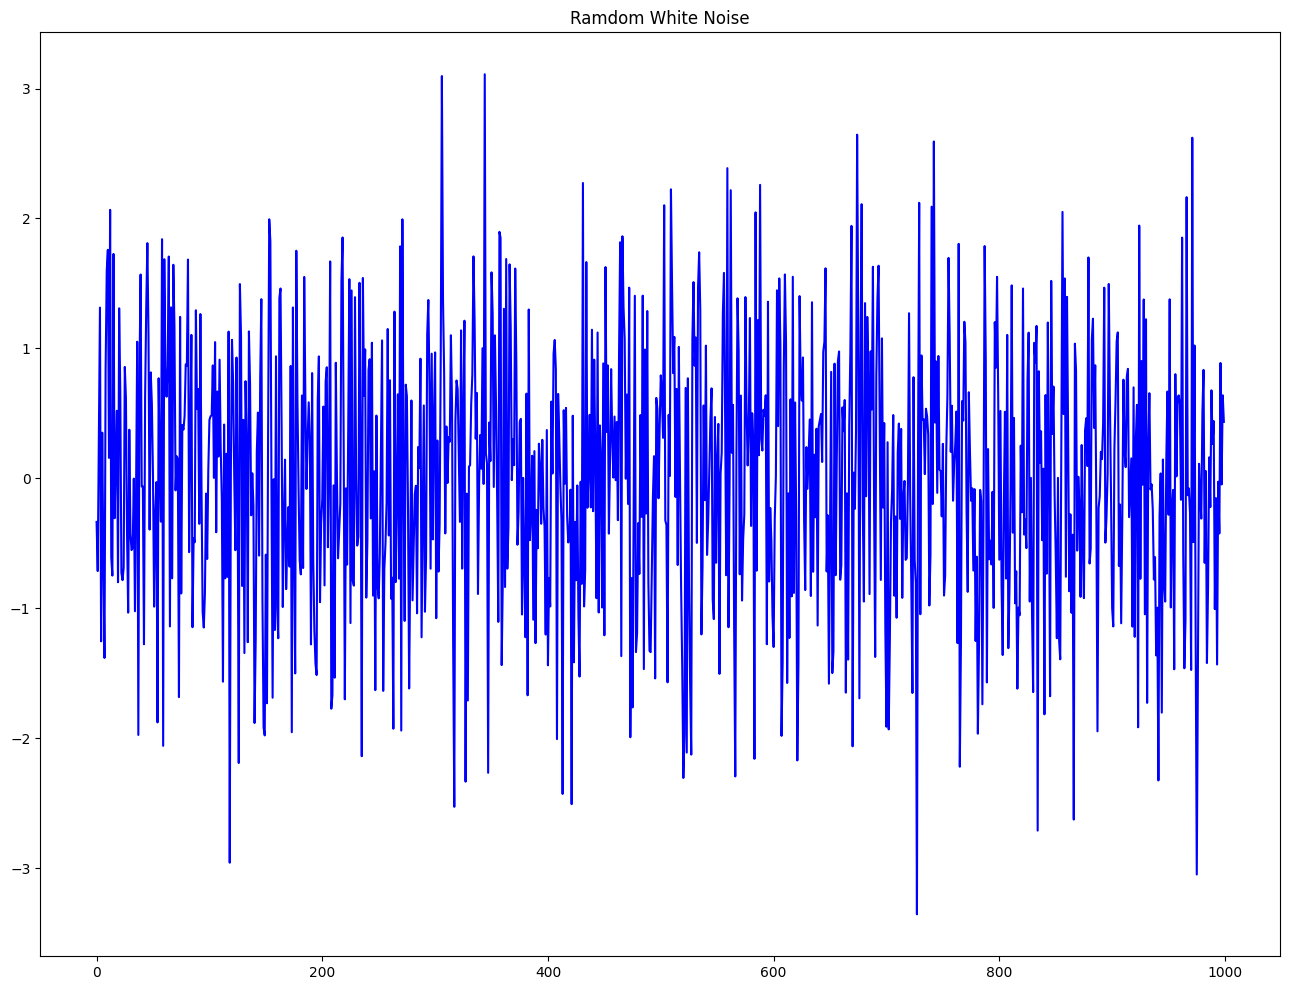

In [9]:
rand_numbers=np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Ramdom White Noise',color='b')

In [10]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Air passengers detrended by subtaccting the least squares fir')

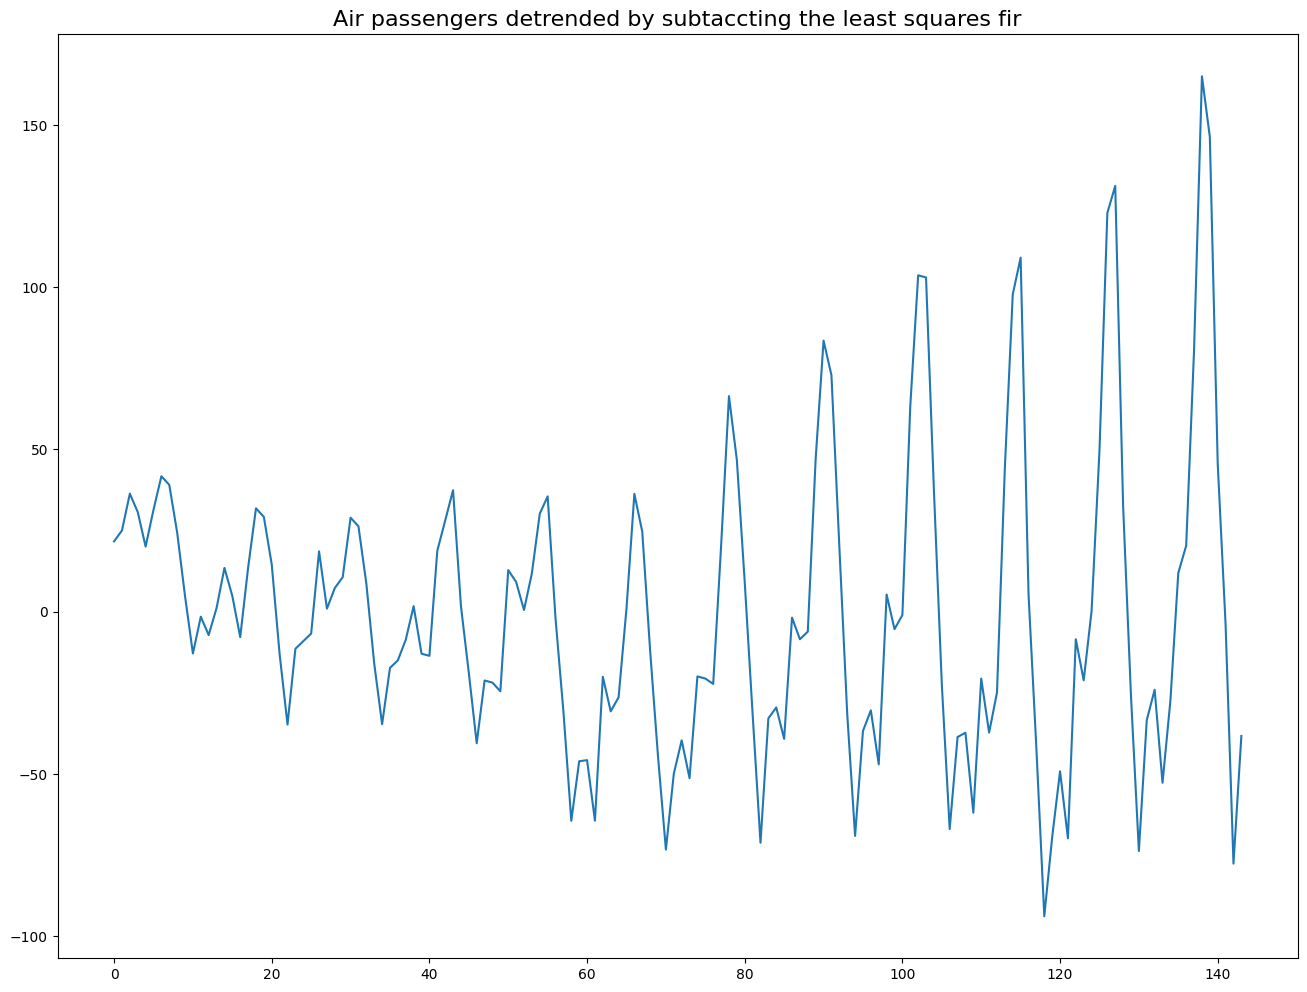

In [11]:
from scipy import signal
detrended=signal.detrend(df['Number of passengers'].values)
plt.plot(detrended)
plt.title('Air passengers detrended by subtaccting the least squares fir',fontsize=16) 

Text(0.5, 1.0, 'Air passengers detrended by subtracing the strend component ')

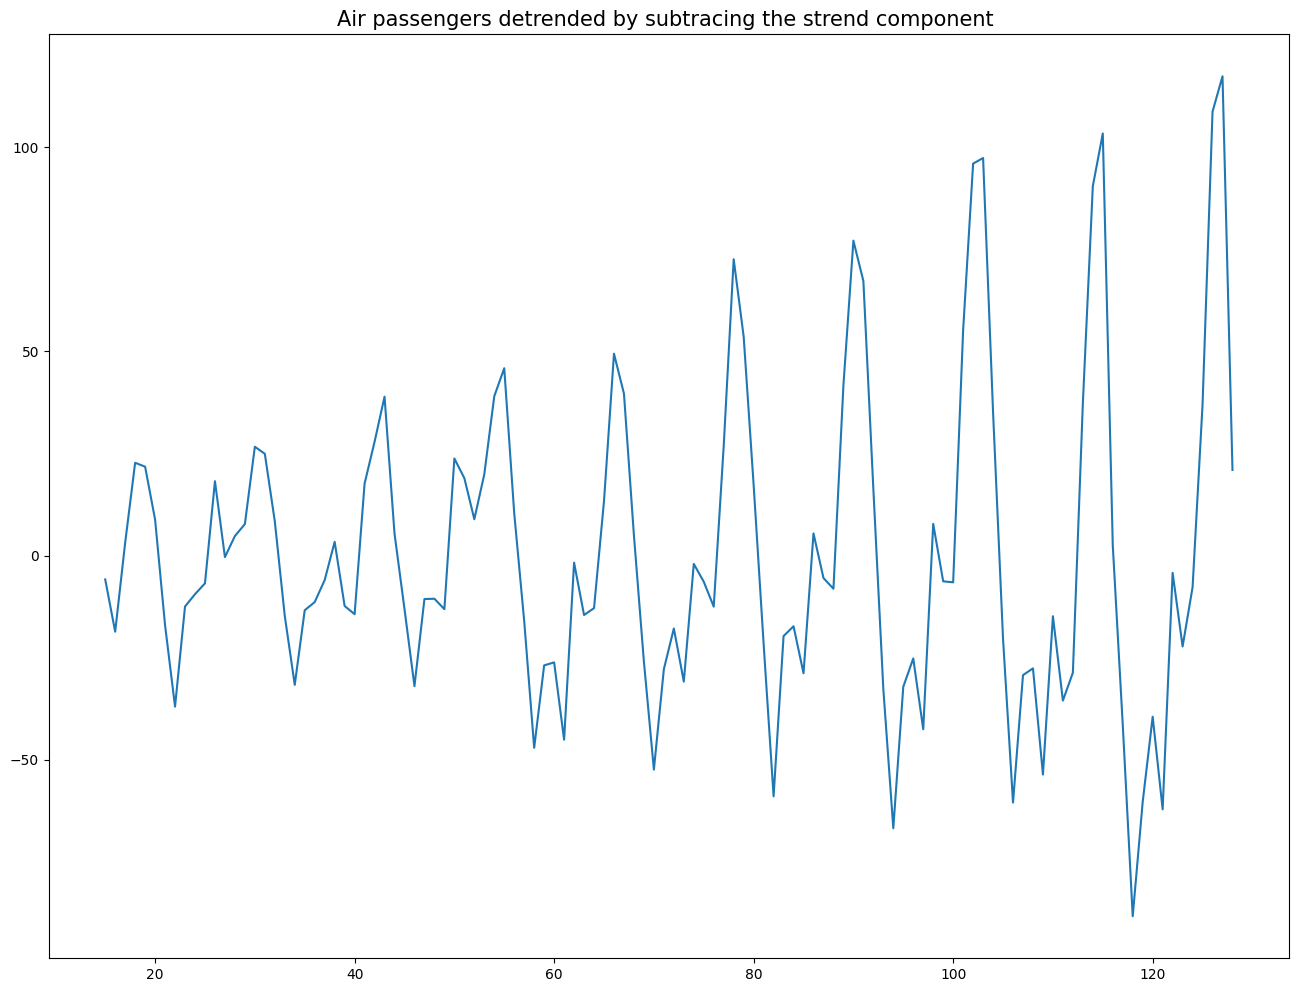

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result_mul=seasonal_decompose(df['Number of passengers'],model='multiplicative',period=30)
detrended=df['Number of passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title("Air passengers detrended by subtracing the strend component ",fontsize=15)

[]

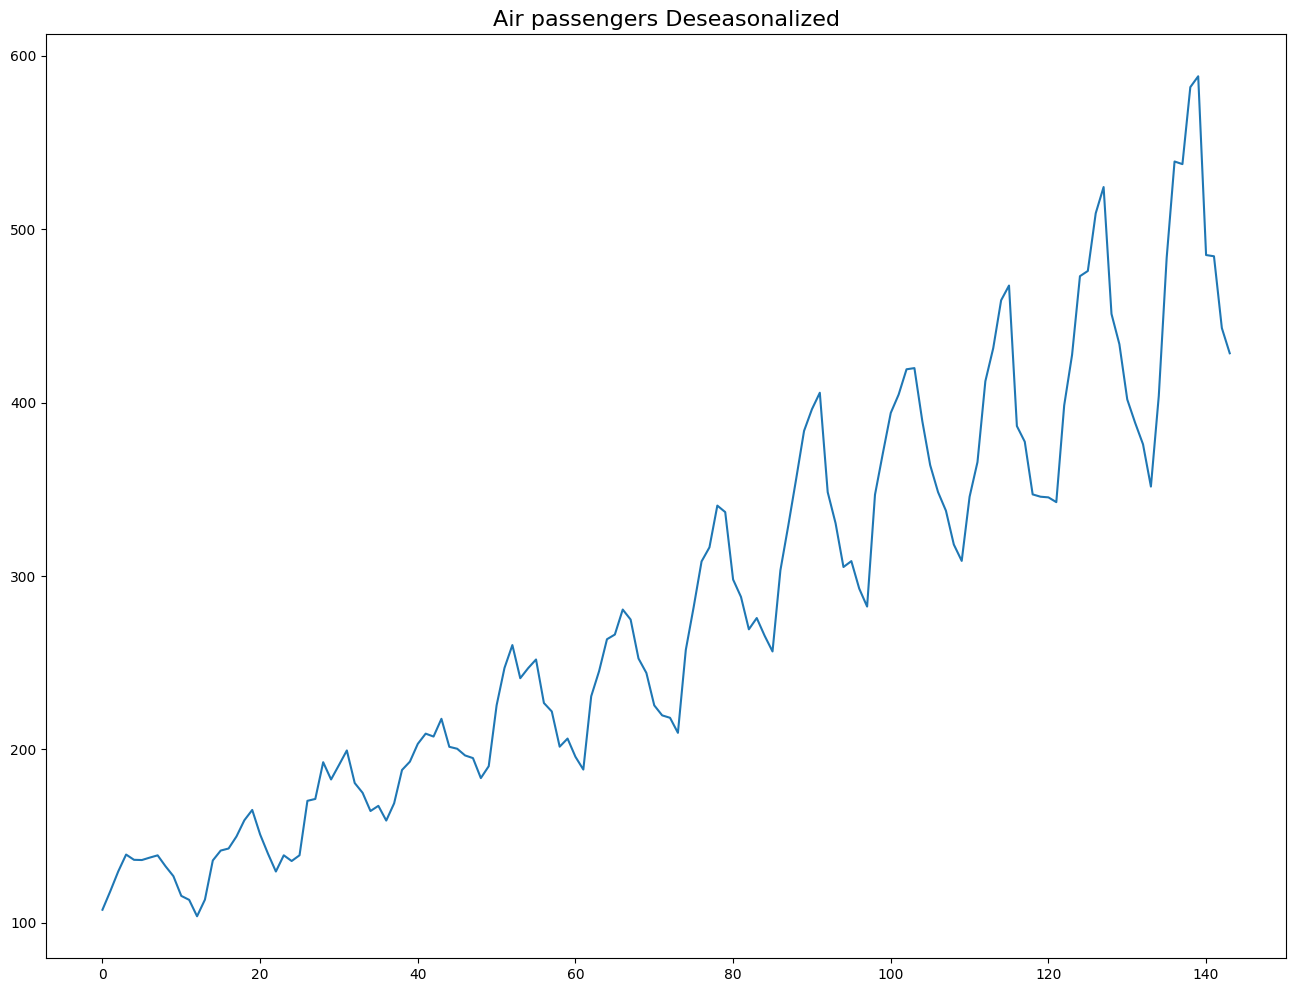

In [13]:
result_mul = seasonal_decompose(df['Number of passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air passengers Deseasonalized', fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

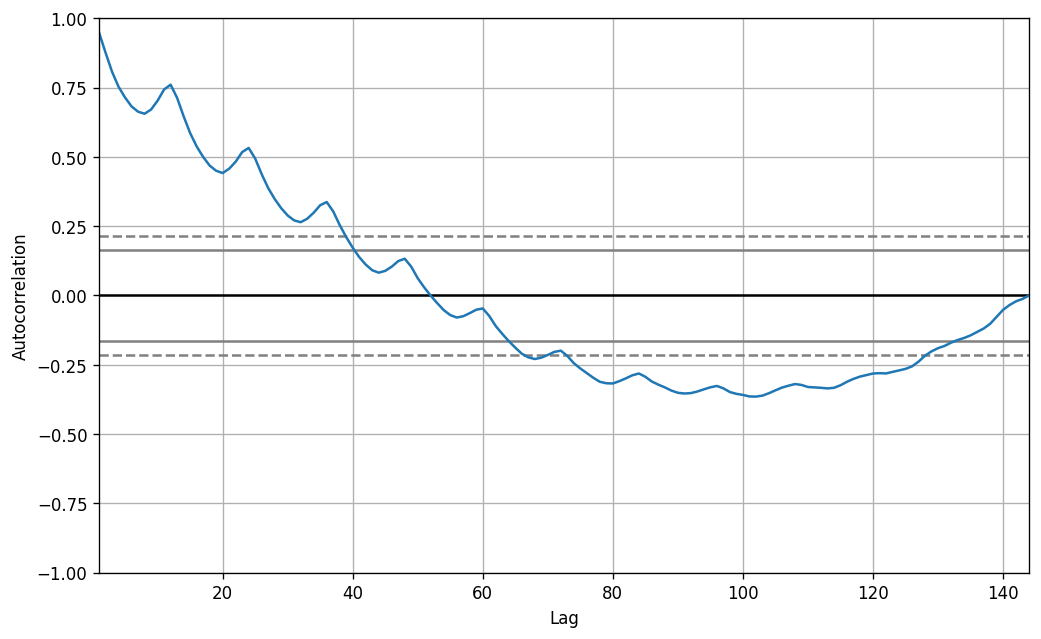

In [14]:
from pandas.plotting import autocorrelation_plot 
plt.rcParams.update({'figure.figsize':(10,6),'figure.dpi':120})
autocorrelation_plot(df['Number of passengers'].tolist())

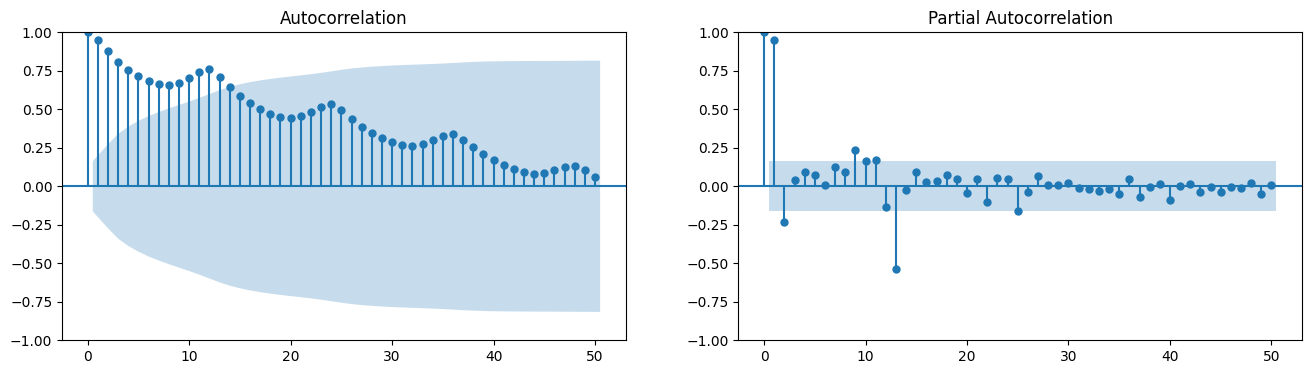

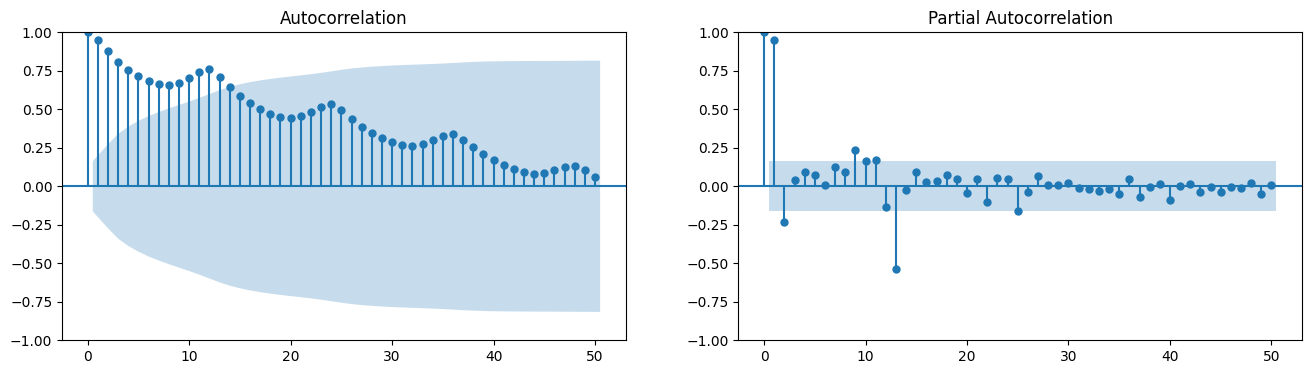

In [15]:
from statsmodels.tsa.stattools import acf,pacf 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
fig,axes=plt.subplots(1,2,figsize=(16,4),dpi=100)
plot_acf(df['Number of passengers'].tolist(),lags=50,ax=axes[0])
plot_pacf(df["Number of passengers"].tolist(),lags=50,ax=axes[1])

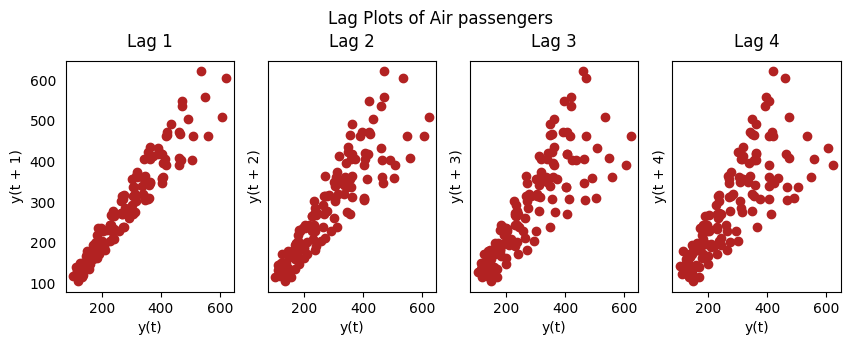

In [16]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air passengers', y=1.05)    
plt.show()

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('/Users/palammysurareddy/Downloads/dataset.txt')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.779674835573644, 3.661425871352997e-12, 200.0, 1),
   'ssr_chi2test': (55.60136995810725, 8.876175235021281e-14, 1),
   'lrtest': (49.142602330049954, 2.3801430060455094e-12, 1),
   'params_ftest': (54.779674835573694, 3.661425871352944e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.69891799873255, 1.9133235086855594e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227385, 3.5267600881273596e-73, 2),
   'lrtest': (196.9955927718221, 1.670900349911483e-43, 2),
   'params_ftest': (162.69891799873264, 1.913323508685476e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}